# 모델 임포트하기

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import patsy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

# Pasty를 이용한 통계 모델 정의

In [2]:
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [3]:
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

D:\Downloads\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -8.88178420e-16])

In [4]:
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [5]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [6]:
type(X)

patsy.design_info.DesignMatrix

In [7]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [8]:
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [9]:
model = sm.OLS(y, X)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -8.881784e-16
dtype: float64

In [10]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -8.881784e-16
dtype: float64

In [11]:
from collections import defaultdict

data = defaultdict(lambda: np.array([]))
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [12]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

이 경우에는 둘 이상의 설명 변수가 있으며$^{(a와 b)}$, 여기에서는 절편이 명시적으로 공식에 포함돼 있다. 모델에 절편을 포함하지 않으려면 $-1$ 표기를 사용해 이 항을 제거할 수 있다.

In [13]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [14]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [15]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [16]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [17]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [18]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [19]:
patsy.dmatrices("y ~ a**2", data=data)[1].design_info.term_names

['Intercept', 'a']

In [20]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [21]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [22]:
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

pasty 공식에서는 수치 데이터 유형(float 또는 int)이 아닌 변수는 모두 범주형 변수로 해석하고 자동으로 인코딩한다. 수치 변수는 $C(x)$ 표기법을 사용하면 변수 $x$를 범주형 변수로 취급하도록 명시적으로 지정할 수 있다.

In [23]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [24]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [25]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [26]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


# 선형 회귀

In [27]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})

def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2

data["y_true"] = y_true(x1, x2)

e = np.random.randn(N)
data["y"] = data["y_true"] + e

model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     24.94
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.83e-09
Time:                        19:27:10   Log-Likelihood:                -276.48
No. Observations:                 100   AIC:                             559.0
Df Residuals:                      97   BIC:                             566.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8205      0.394      4.623      0.0

In [28]:
result.rsquared

0.33955525172291545

In [29]:
result.resid.head()

0    1.505167
1   -1.589121
2   -4.501230
3   -0.885507
4    0.453959
dtype: float64

In [30]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.43089415596898517

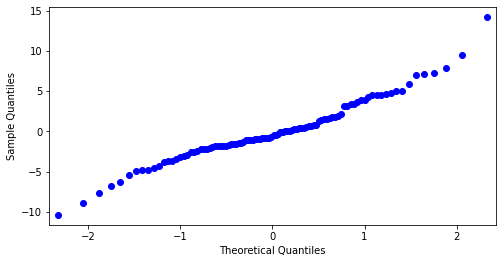

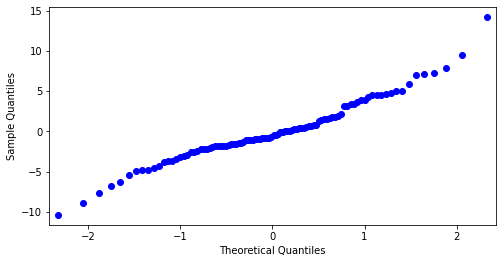

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [32]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     770.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           5.23e-67
Time:                        19:35:20   Log-Likelihood:                -136.12
No. Observations:                 100   AIC:                             280.2
Df Residuals:                      96   BIC:                             290.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9369      0.100      9.378      0.0

In [33]:
result.rsquared

0.9601305117087491

In [34]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.04598519086549822

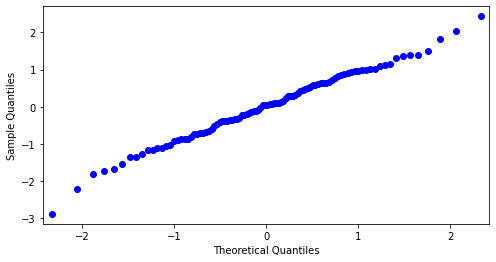

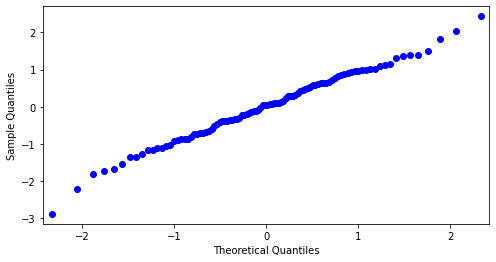

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [36]:
result.params

Intercept    0.936884
x1           1.991330
x2           2.980766
x1:x2        3.780604
dtype: float64

In [37]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

y_pred = result.predict(new_data)
y_pred.shape

(2500,)

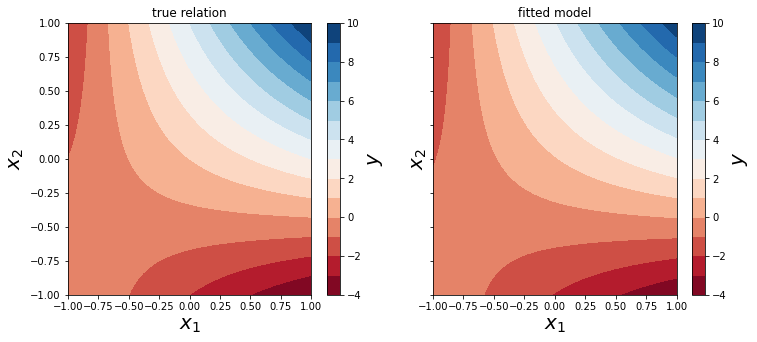

In [38]:
y_pred = y_pred.values.reshape(50, 50)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

## 예제 데이터셋

In [39]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")
dataset.title

'Ice Cream Consumption'

In [40]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


cons - 소비, income - 수입, price - 가격, temp - 온도

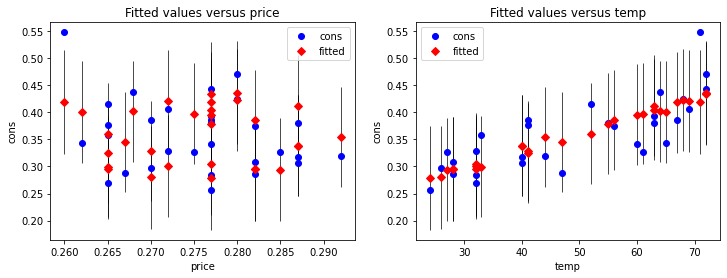

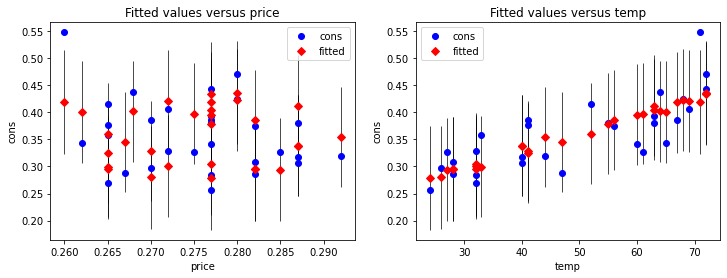

In [41]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
result = model.fit()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

# 이산 회귀 분석

In [42]:
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [44]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True)
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [45]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [46]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.8517
Time:                        20:08:19   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [47]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


In [48]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)
df_new["P-Species"].head(3)

0    0.984236
1    0.000136
2    0.979886
Name: P-Species, dtype: float64

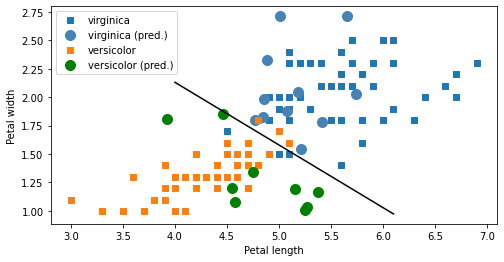

In [49]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# virginica 종
ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

# versicolor 종
ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

# 경계선
_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

## 푸아송 모델

In [50]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time").rename(columns={"value": "discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


<AxesSubplot:xlabel='time'>

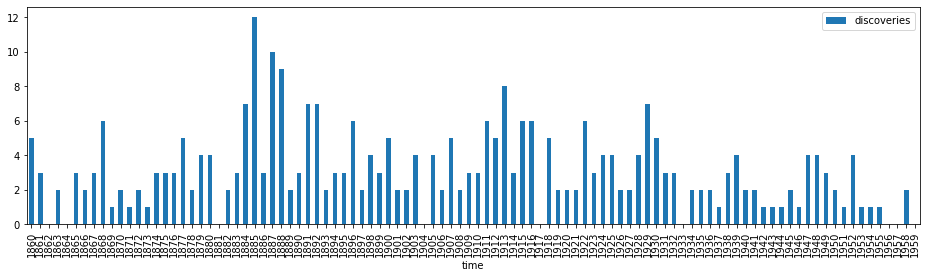

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)

In [52]:
model = smf.poisson("discoveries ~ 1", data=df)
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


In [53]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                   0.000
Time:                        20:26:29   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


In [54]:
lmbda = np.exp(result.params) 
X = stats.poisson(lmbda)
result.conf_int()

,0,1
Intercept,1.020084,1.242721


D:\Downloads\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


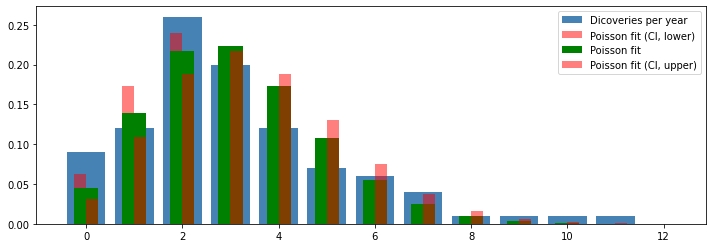

In [55]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year') 
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')
ax.legend()

# 시계열

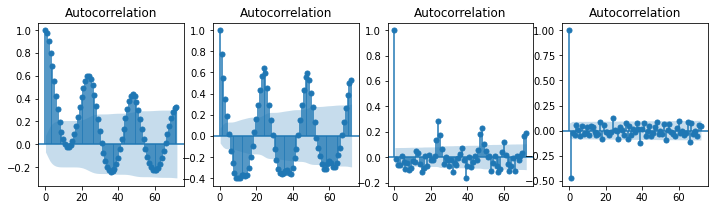

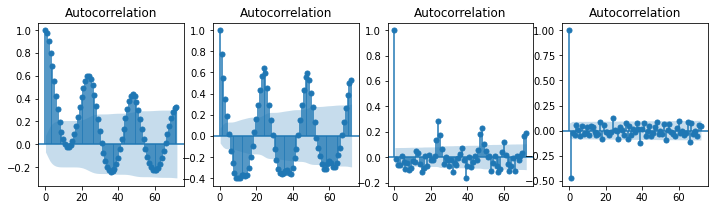

In [56]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])

In [57]:
model = sm.tsa.AR(df_march.temp)
result = model.fit(72)
sm.stats.durbin_watson(result.resid)

D:\Downloads\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarn

1.9985623006352993

더빈-왓슨$^{Durbin-Watson}$ 통계 검정은 시계열에서의 정상 상태(stationary, 남은 자기 상관이나 추세가없음) 여부를 알아보는데 사용할 수 있다. 더빈-왓슨 검정은 0에서 4 사이의 값을 반환하며 2에 가까운 값은 시계열에 남은 자기 상관 관계가 없다는 것을 의미한다.

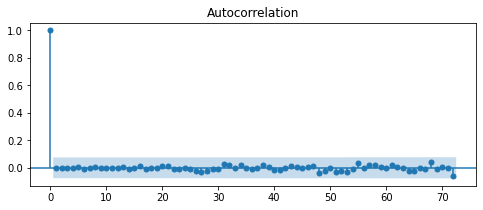

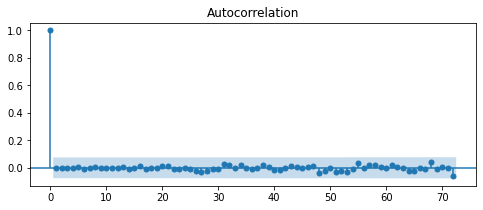

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)

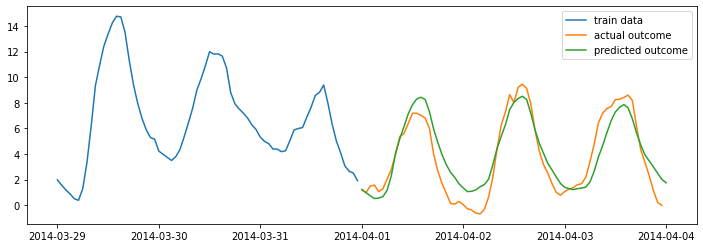

In [60]:
temp_3d_forecast = result.predict("2014-04-01", "2014-04-4")

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
        temp_3d_forecast, label="predicted outcome")

ax.legend()